In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.stats as stats

import torch 
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [49]:
df.head(50)

,Unnamed: 0,Date,Player,Elo,StartTime,Moves_length,coin_frac_d,coin_frac_m,coin_frac_e,coin_frac_d_18,...,won_resignation,drawn_50move,drawn_insmaterial,drawn_stalemate,won_abandoned,won_checkmate,drawn_repet,drawn_timeout,drawn_agreement,won_time
0,0,2019.06.02,MNikolov,2557,10:32:09,53,0.6,0.800000,0.600000,0.2,...,1,0,0,0,0,0,0,0,0,0
1,1,2019.08.21,Tigranpatagonian,2175,23:29:33,75,0.8,0.615385,0.428571,0.6,...,1,0,0,0,0,0,0,0,0,0
2,2,2022.01.28,Turkchess1905,2832,15:03:32,56,1.0,0.814815,0.476190,1.0,...,0,0,0,0,0,0,1,0,0,0
3,3,2022.05.28,Y0ung_Capablanca,2841,09:46:46,143,0.2,0.506329,0.642857,0.2,...,1,0,0,0,0,0,0,0,0,0
4,4,2023.01.20,LikeWater,2751,17:58:12,48,0.6,0.476190,0.421053,0.6,...,1,0,0,0,0,0,0,0,0,0
5,5,2023.07.06,atbenina64,2764,15:17:23,99,0.2,0.470588,0.550000,0.2,...,1,0,0,0,0,0,0,0,0,0
6,6,2022.07.11,xinzhaoo,2779,21:38:14,82,0.2,0.325581,0.193548,0.2,...,1,0,0,0,0,0,0,0,0,0
7,7,2022.10.19,VeryMasculineEgirl,2828,01:52:54,158,0.4,0.482759,0.190476,0.6,...,0,0,0,0,0,0,1,0,0,0
8,8,2022.10.26,David_Arutinian,2788,04:52:15,88,0.4,0.355556,0.571429,0.2,...,1,0,0,0,0,0,0,0,0,0
9,9,2021.01.20,AttractivePearl,2770,01:29:28,80,1.0,0.325581,0.344828,1.0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
df = df.drop(['StartTime','Date'], axis=1)

In [ ]:


bin_size = 50
bins = np.arange(df['Elo'].min(), df['Elo'].max() + bin_size, bin_size)

mean_coinc = []
lower_bounds = []
upper_bounds = []

for i in tqdm(range(len(bins) - 1)):
    bin_data = df[(df['Elo'] >= bins[i]) & (df['Elo'] < bins[i + 1])]
    if len(bin_data) > 0:
        frac = bin_data['coin_frac_e'].to_numpy()
        mean = frac.mean()
        std_err = stats.sem(frac)
        ci = stats.t.interval(0.95, len(bin_data) - 1, loc=mean, scale=std_err)

        mean_coinc.append(mean)
        lower_bounds.append(ci[0])
        upper_bounds.append(ci[1])
    else:
        mean_coinc.append(np.nan)
        lower_bounds.append(np.nan)
        upper_bounds.append(np.nan)

bin_centers = bins[:-1] + bin_size / 2

 95%|█████████▍| 71/75 [00:09<00:00, 22.22it/s]/opt/app-root/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/app-root/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 75/75 [00:09<00:00,  7.70it/s]


In [66]:
def perc_frac_95(elo):
    for i in range(len(bin_centers)):
        if abs(elo - bin_centers[i]) < 25: 
            break
    return upper_bounds[i]

def perc_frac_5(elo):
    for i in range(len(bin_centers)):
        if abs(elo - bin_centers[i]) < 25: 
            break
    return lower_bounds[i]

In [ ]:
df['95perc_frac_e'] = df['Elo'].apply(lambda x: perc_frac_95(x))
df['5perc_frac_e'] = df['Elo'].apply(lambda x: perc_frac_5(x))

In [ ]:


class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.Dropout(0.2),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.Dropout(0.2),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 64),
            nn.LeakyReLU(0.3),
            nn.Linear(64, input_dim)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
        

In [139]:


fr = ['HansOnTwitch',
'kirillshevchenko',
'MaximDlugy',
'DanielNaroditsky',
'Jospem',
'CentrumSakkiskola',
'Arash-Tiger',
'Kiborg95' ,
'PaperLL',
'polina131',
'harley-storm',
'Mr-ChessBeastt',
'matyurasov',
'messi2008',
'mume195',
's1lonmaster',
'LimitlessAntler',
'Theee999',
'GoofyCondor',
'WWYDlIKYRN',
'OOTORIKYOUYA',
 'seriousness',
'Jimzon',
'janvanrun', 
'V-SAMSONOV',
'Rudoziev',
'xcicadax',
'golfn1',
'JustAnotherStoic', 
'pondababa',
'nomoreban',
'RichScene',
      'BlueTreeQ',
      'endgametecnic',
      'FrogTheGm',
      'aline_maulin',
      'Louis_GM',
      'TheFlex',
      'MrGelfand',
      '08zimleoH',
      'Kei_Shibuya',
      'ramtinKKV',
      'SomeKurdboy',
      'intergr',
      '1SClayman',
      'BCstandart',
      'ATLHOU21'
]

gd = [
    'MagnusCarlsen',
    'VladimirKramnik',
    'Chefshouse',
    'TheVish',
    'lachesisQ',
    'Firouzja2003',
    'GMWSO',
    'Hikaru',
    'yifan0227',
    'ChessQueen',
    'Juwen',
    'LevonAronian',
    'AnisjGiri',
    'Azerichess',
    'GukeshDommaraju',
    'SergeyKarjakin',
    'FormerProdigy',
    'PSvidler',
    'FabianoCaurano',
    'Bigfish1995',
    'igorkovalenko',
    'GukeshDommaraju',
    'Flawless_Fighter',
    'lili_ani',
    'Polish_fighter3000',
    'Grischuk',
    'JuditPolgar',
    'annamaja',
    'annacramling',
    'DominezOnYoutube'
]

In [144]:
def get_true_label(name):
    if  name in fr:
        return 1
    elif name in gd:
        return 0
    else:
        return 2

In [ ]:
df['role'] = df['Player'].apply(lambda x: get_true_label(x))

Количество записей в бине 2101-2201 = 372651
Количество чистых записей в бине 2101-2201 = 372645
Bin: 2101-2201, Epoch: 0, Loss: 0.8653531074523926
Bin: 2101-2201, Epoch: 50, Loss: 0.8575504422187805
Bin: 2101-2201, Epoch: 100, Loss: 0.8416572213172913
Bin: 2101-2201, Epoch: 150, Loss: 0.7873119711875916
Bin: 2101-2201, Epoch: 200, Loss: 0.6844074130058289


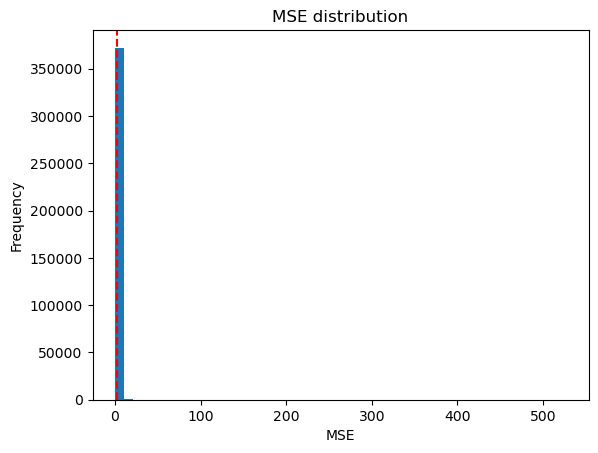

Найдено аномалий: 3727
0 0.0 0.0


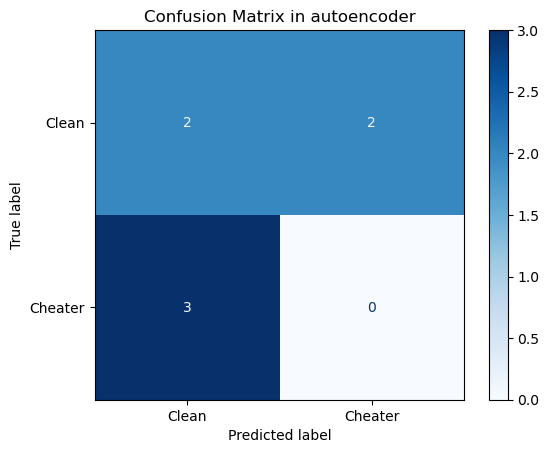

Количество записей в бине 2201-2301 = 471682
Количество чистых записей в бине 2201-2301 = 471680
Bin: 2201-2301, Epoch: 0, Loss: 0.8681765198707581
Bin: 2201-2301, Epoch: 50, Loss: 0.8599525094032288
Bin: 2201-2301, Epoch: 100, Loss: 0.8491727113723755
Bin: 2201-2301, Epoch: 150, Loss: 0.8187834024429321
Bin: 2201-2301, Epoch: 200, Loss: 0.737922191619873


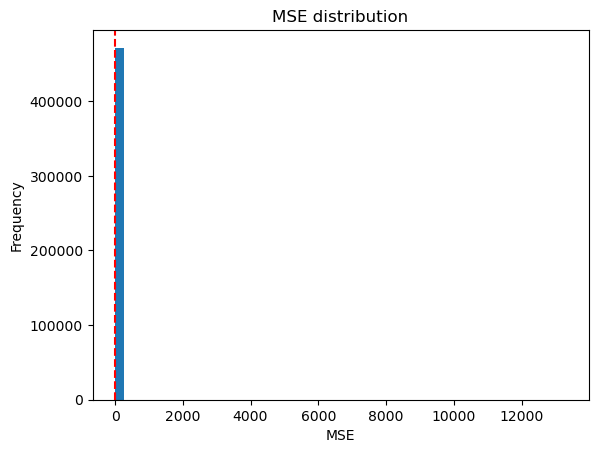

Найдено аномалий: 4717
1 0.00021199915200339198 0.5


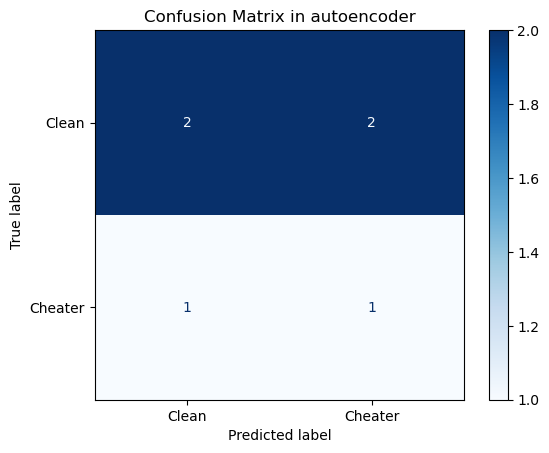

Количество записей в бине 2301-2401 = 583063
Количество чистых записей в бине 2301-2401 = 583061
Bin: 2301-2401, Epoch: 0, Loss: 0.8663777112960815
Bin: 2301-2401, Epoch: 50, Loss: 0.8584427237510681
Bin: 2301-2401, Epoch: 100, Loss: 0.84527587890625
Bin: 2301-2401, Epoch: 150, Loss: 0.8036744594573975
Bin: 2301-2401, Epoch: 200, Loss: 0.7267208099365234


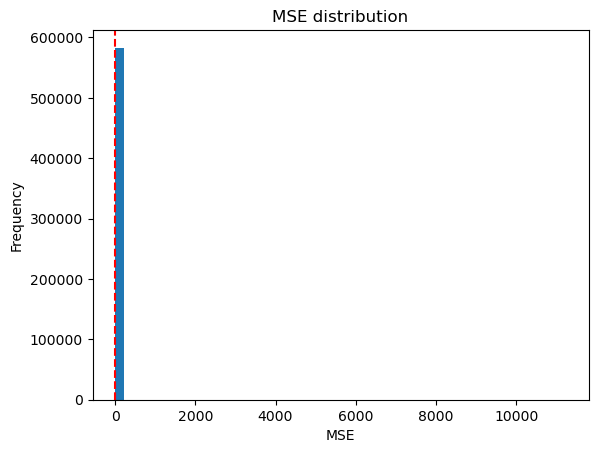

Найдено аномалий: 5831
1 0.0001714971702966901 0.5


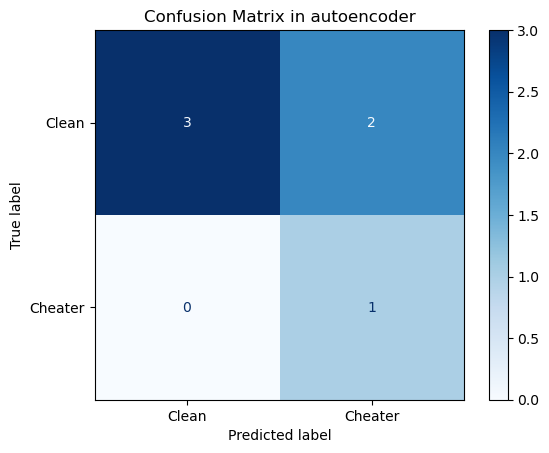

Количество записей в бине 2401-2501 = 663443
Количество чистых записей в бине 2401-2501 = 663442
Bin: 2401-2501, Epoch: 0, Loss: 0.8660807013511658
Bin: 2401-2501, Epoch: 50, Loss: 0.8573079705238342
Bin: 2401-2501, Epoch: 100, Loss: 0.8420532941818237
Bin: 2401-2501, Epoch: 150, Loss: 0.8003917932510376
Bin: 2401-2501, Epoch: 200, Loss: 0.7382516860961914


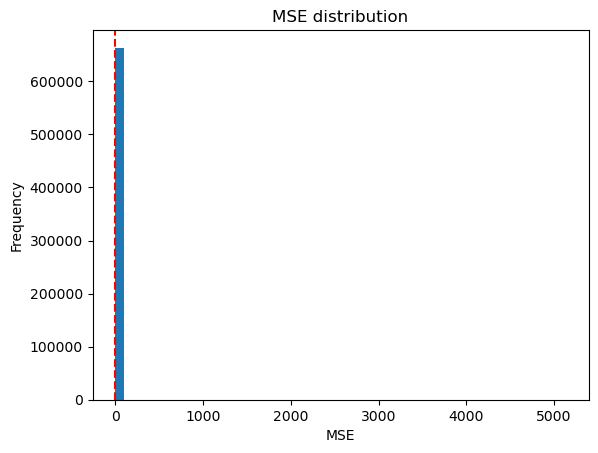

Найдено аномалий: 6635
0 0.0 0.0


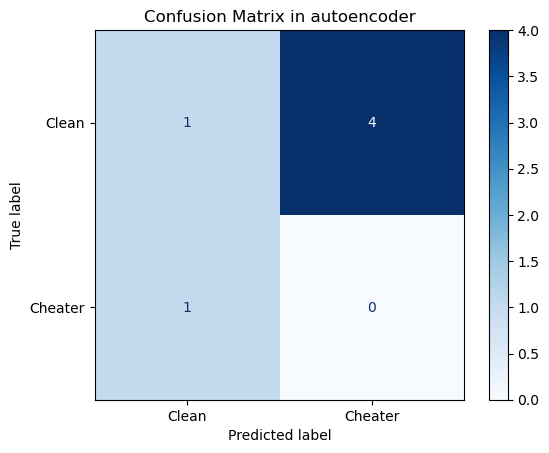

Количество записей в бине 2501-2601 = 651276
Количество чистых записей в бине 2501-2601 = 651261
Bin: 2501-2601, Epoch: 0, Loss: 0.8668630719184875
Bin: 2501-2601, Epoch: 50, Loss: 0.8577505350112915
Bin: 2501-2601, Epoch: 100, Loss: 0.8441368341445923
Bin: 2501-2601, Epoch: 150, Loss: 0.8070001006126404
Bin: 2501-2601, Epoch: 200, Loss: 0.7410213351249695


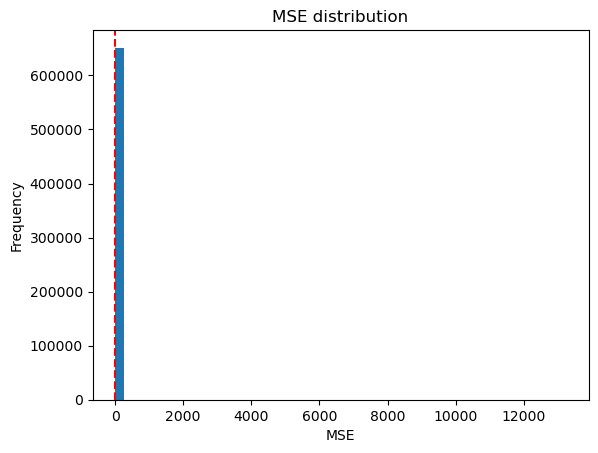

Найдено аномалий: 6513
8 0.0012283126055581146 0.5333333333333333


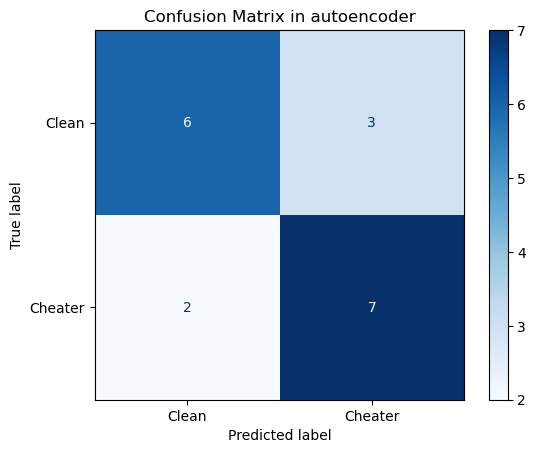

Количество записей в бине 2601-2701 = 642461
Количество чистых записей в бине 2601-2701 = 642293
Bin: 2601-2701, Epoch: 0, Loss: 0.863012433052063
Bin: 2601-2701, Epoch: 50, Loss: 0.8538141846656799
Bin: 2601-2701, Epoch: 100, Loss: 0.8334004878997803
Bin: 2601-2701, Epoch: 150, Loss: 0.7842743992805481
Bin: 2601-2701, Epoch: 200, Loss: 0.7218078970909119


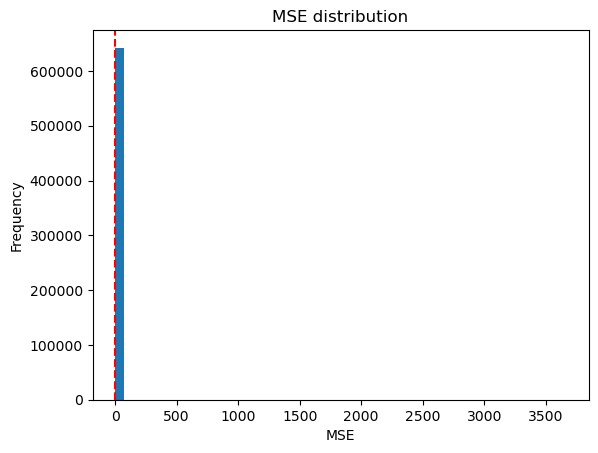

Найдено аномалий: 6425
3 0.0004669260700389105 0.017857142857142856


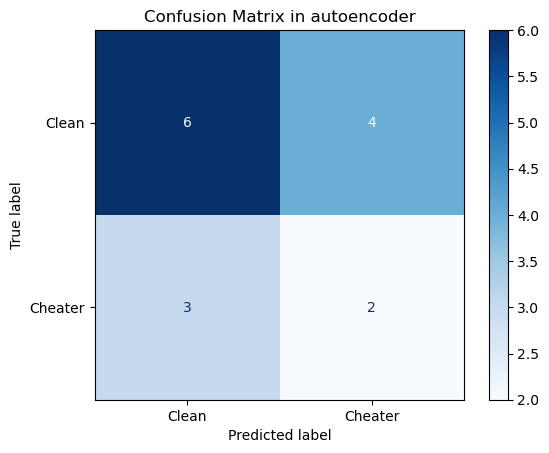

Количество записей в бине 2701-2801 = 576193
Количество чистых записей в бине 2701-2801 = 575188
Bin: 2701-2801, Epoch: 0, Loss: 0.8649981617927551
Bin: 2701-2801, Epoch: 50, Loss: 0.8566447496414185
Bin: 2701-2801, Epoch: 100, Loss: 0.8424040675163269
Bin: 2701-2801, Epoch: 150, Loss: 0.8042764663696289
Bin: 2701-2801, Epoch: 200, Loss: 0.7366622686386108


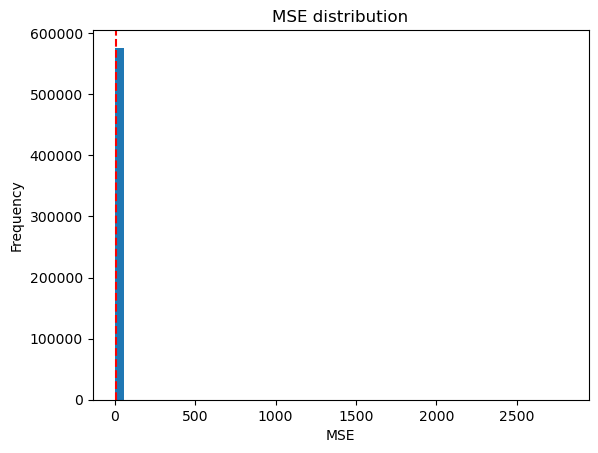

Найдено аномалий: 5762
14 0.0024297119055883376 0.013930348258706468


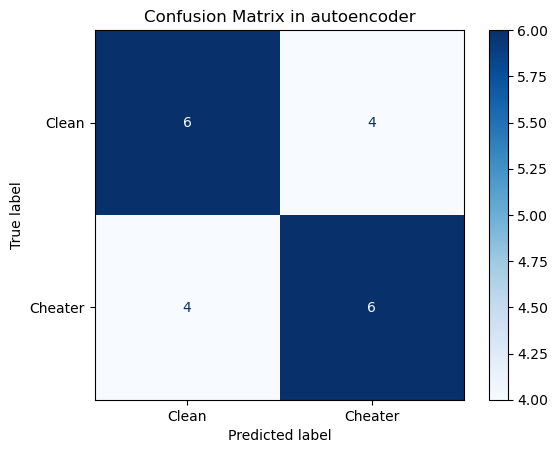

Количество записей в бине 2801-2901 = 429532
Количество чистых записей в бине 2801-2901 = 426074
Bin: 2801-2901, Epoch: 0, Loss: 0.8661371469497681
Bin: 2801-2901, Epoch: 50, Loss: 0.8572137355804443
Bin: 2801-2901, Epoch: 100, Loss: 0.8430781364440918
Bin: 2801-2901, Epoch: 150, Loss: 0.8080075979232788
Bin: 2801-2901, Epoch: 200, Loss: 0.7414250373840332


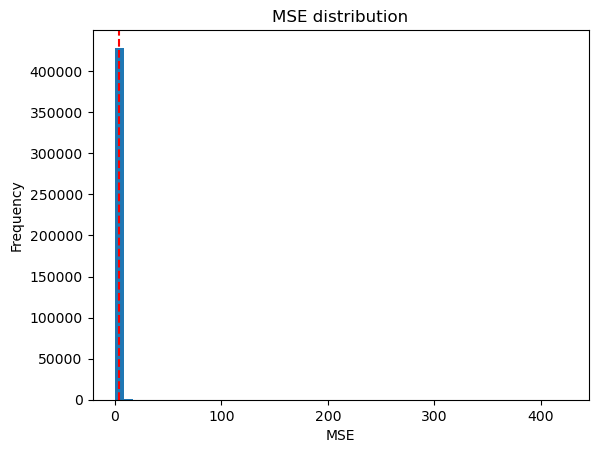

Найдено аномалий: 4296
58 0.013500931098696461 0.0167727009832273


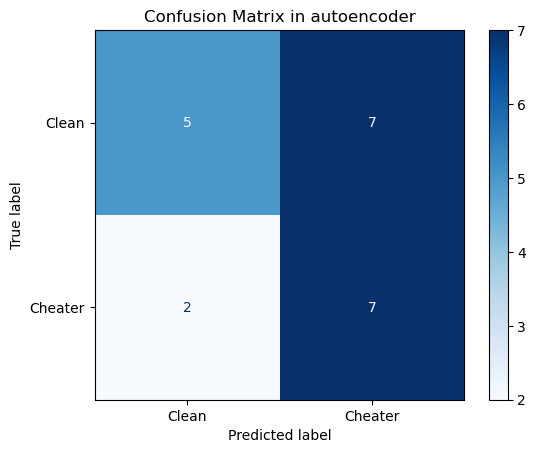

Количество записей в бине 2901-3001 = 217469
Количество чистых записей в бине 2901-3001 = 205639
Bin: 2901-3001, Epoch: 0, Loss: 0.8649015426635742
Bin: 2901-3001, Epoch: 50, Loss: 0.8571957349777222
Bin: 2901-3001, Epoch: 100, Loss: 0.8429786562919617
Bin: 2901-3001, Epoch: 150, Loss: 0.8065513372421265
Bin: 2901-3001, Epoch: 200, Loss: 0.7439817786216736


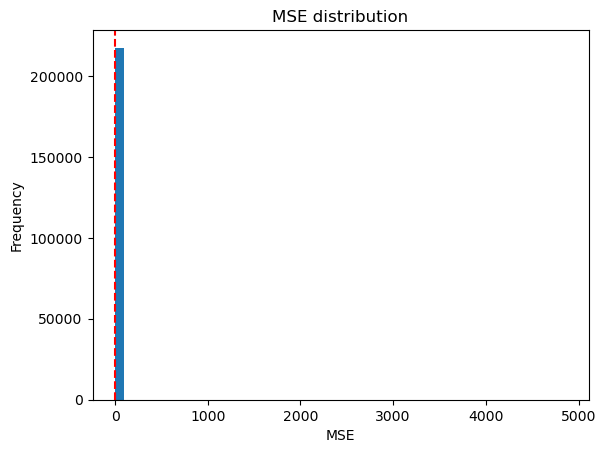

Найдено аномалий: 2175
156 0.07172413793103448 0.013186813186813187


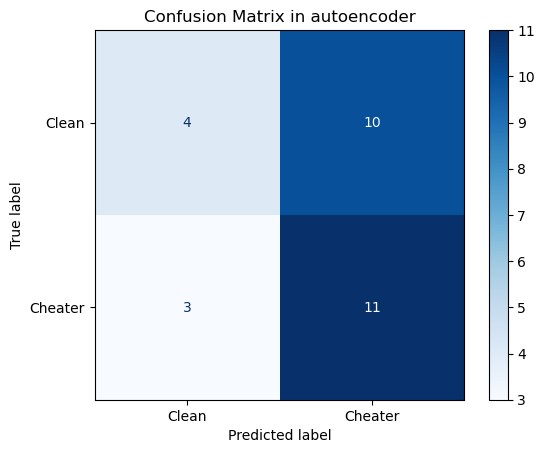

Количество записей в бине 3001-3101 = 75606
Количество чистых записей в бине 3001-3101 = 60067
Bin: 3001-3101, Epoch: 0, Loss: 0.8674115538597107
Bin: 3001-3101, Epoch: 50, Loss: 0.8583989143371582
Bin: 3001-3101, Epoch: 100, Loss: 0.8443043231964111
Bin: 3001-3101, Epoch: 150, Loss: 0.8114399909973145
Bin: 3001-3101, Epoch: 200, Loss: 0.7469103932380676


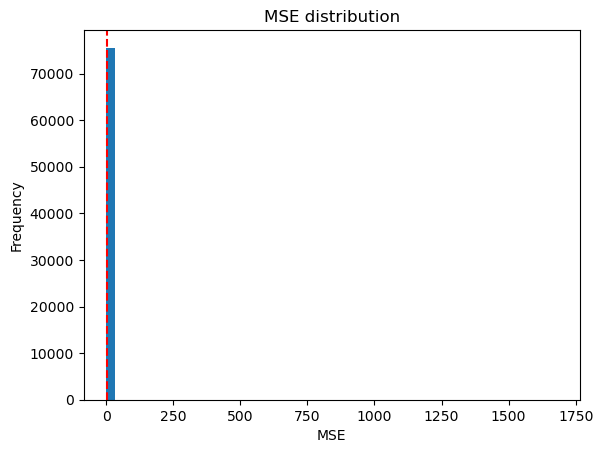

Найдено аномалий: 757
231 0.3051519154557464 0.014865821481433813


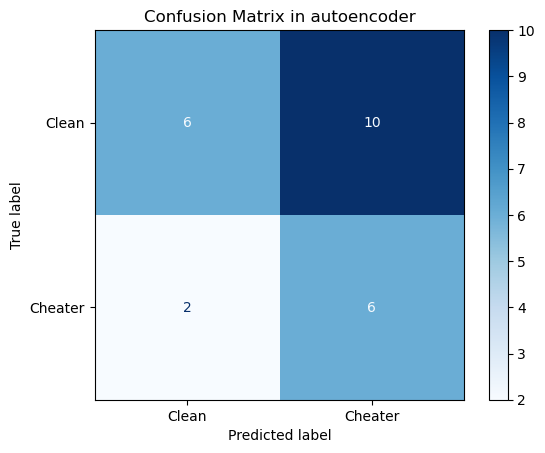

Количество записей в бине 3101-3201 = 24341
Количество чистых записей в бине 3101-3201 = 17014
Bin: 3101-3201, Epoch: 0, Loss: 0.8660776615142822
Bin: 3101-3201, Epoch: 50, Loss: 0.8574749827384949
Bin: 3101-3201, Epoch: 100, Loss: 0.8396665453910828
Bin: 3101-3201, Epoch: 150, Loss: 0.7836235165596008
Bin: 3101-3201, Epoch: 200, Loss: 0.7237377166748047


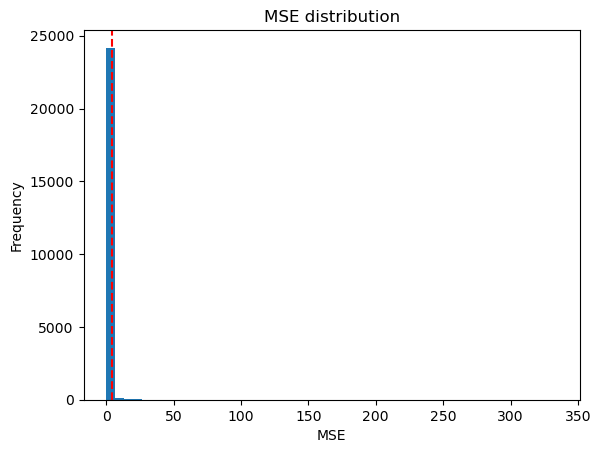

Найдено аномалий: 244
93 0.38114754098360654 0.012692780128292617


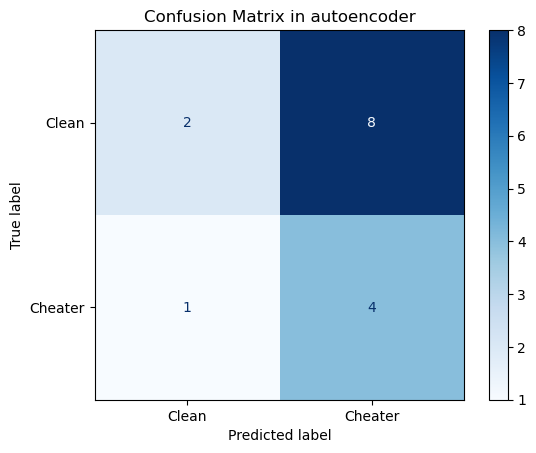

Количество записей в бине 3201-3301 = 11271
Количество чистых записей в бине 3201-3301 = 10927
Bin: 3201-3301, Epoch: 0, Loss: 0.8655655384063721
Bin: 3201-3301, Epoch: 50, Loss: 0.8564032912254333
Bin: 3201-3301, Epoch: 100, Loss: 0.8385790586471558
Bin: 3201-3301, Epoch: 150, Loss: 0.7885211706161499
Bin: 3201-3301, Epoch: 200, Loss: 0.717012882232666


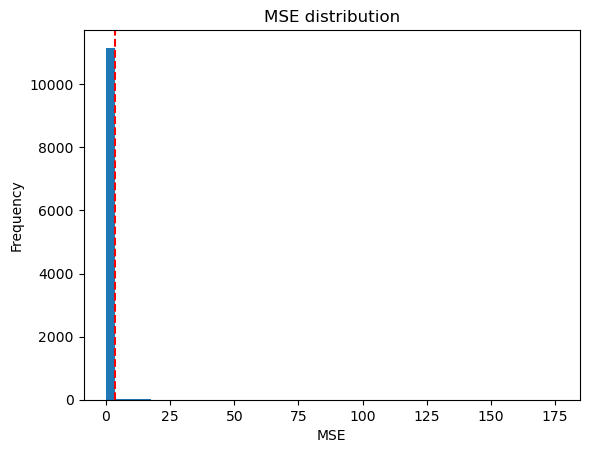

Найдено аномалий: 113
7 0.061946902654867256 0.020348837209302327


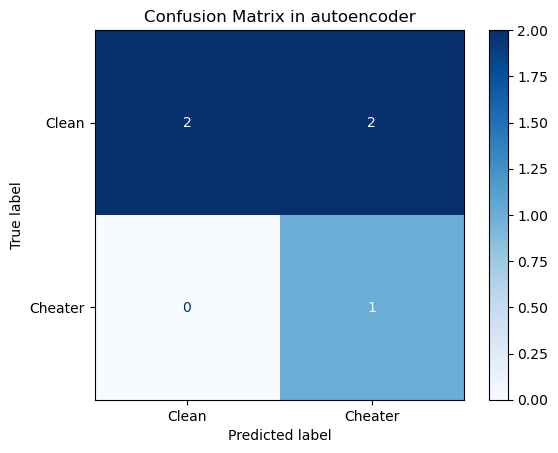

Количество записей в бине 3301-3401 = 371
Количество чистых записей в бине 3301-3401 = 371
Bin: 3301-3401, Epoch: 0, Loss: 0.8645102977752686
Bin: 3301-3401, Epoch: 50, Loss: 0.8563210964202881
Bin: 3301-3401, Epoch: 100, Loss: 0.8334112167358398
Bin: 3301-3401, Epoch: 150, Loss: 0.7455449104309082
Bin: 3301-3401, Epoch: 200, Loss: 0.6454691886901855


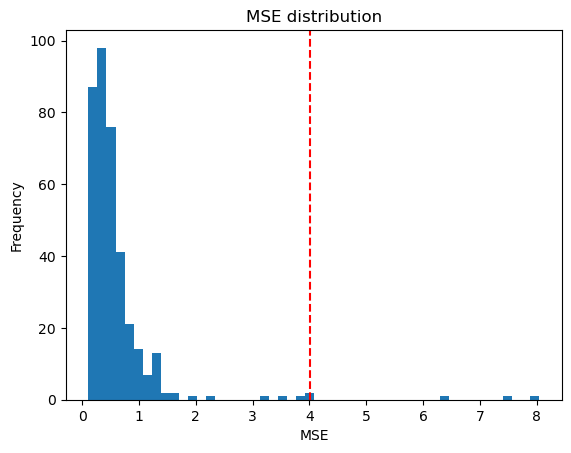

Найдено аномалий: 4
0 0.0 0.0


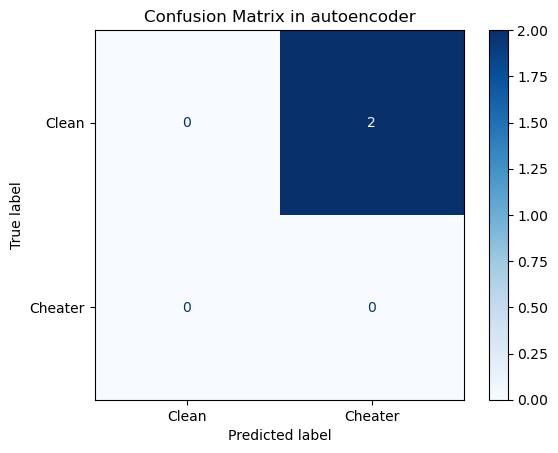

In [ ]:
bin_size = 100
bins = np.arange(df['Elo'].min(), df['Elo'].max() + bin_size, bin_size)

for i in range(20, len(bins)-1):
    df_part = df[df['Elo'] > bins[i]]
    df_part = df_part[df_part['Elo'] < bins[i+1]]
    df_part['role'] = df_part['Player'].apply(lambda x: get_true_label(x))
    df_part = df_part[df_part['result'] == 1]
    print(f'Количество записей в бине {bins[i]}-{bins[i+1]} = {len(df_part)}')
    df_clean = df_part[~df_part['Player'].isin(fr)]
    print(f'Количество чистых записей в бине {bins[i]}-{bins[i+1]} = {len(df_clean)}')
    scaler = StandardScaler()
    df_X = scaler.fit_transform(df_clean.iloc[:,3:-1])
    X_tensor = torch.tensor(df_X, dtype=torch.float32)
    model = Autoencoder(input_dim = 49)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    n_epochs = 250
    for epoch in range(n_epochs):
        model.train()
        output = model(X_tensor)
        loss = criterion(output, X_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0: 
            print(f'Bin: {bins[i]}-{bins[i+1]}, Epoch: {epoch}, Loss: {loss}')
            
    model.eval()
    with torch.no_grad():
        df_X = scaler.fit_transform(df_part.iloc[:,3:-1])
        X_tensor = torch.tensor(df_X, dtype=torch.float32)
        reconstructed = model(X_tensor)
        reconstruction_error = torch.mean((X_tensor - reconstructed) ** 2, dim=1).numpy()
    threshold = np.percentile(reconstruction_error, 99)
    plt.hist(reconstruction_error, bins=50)
    plt.axvline(threshold, color='red', linestyle='--')
    plt.title('MSE distribution')
    plt.xlabel('MSE')
    plt.ylabel('Frequency')
    plt.show()
    anomalies = reconstruction_error > threshold
    df_part['is_anom'] = anomalies
    anom_games = df_part[anomalies]
    anom_games.to_csv(f'anom_games/autoencoder/bin {bins[i]}-{bins[i+1]}')
    print(f'Найдено аномалий: {len(anom_games)}')
    mask = anom_games['Player'].isin(fr) 
    df_fr = anom_games[mask]
    mask2 = df_part['Player'].isin(fr) 
    df_fr2 = df_part[mask2]
    print(len(df_fr), len(df_fr)/max(1, len(anom_games)), len(df_fr)/max(1, len(df_fr2)))
    
    df_f = df_part[df_part['role'].isin([1, 0])].copy()
    
    if len(df_f) > 0: 
        predicted = df_f.groupby('Player')['is_anom'].max().reset_index()
        predicted.columns = ['Player', 'predicted_cheater']
        predicted['true_cheater'] = predicted['Player'].apply(
            lambda x: 1 if x in fr else 0
        )

        y_pred = predicted['predicted_cheater']
        y_true = predicted['true_cheater']

        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clean', 'Cheater'])
        disp.plot(cmap='Blues')
        plt.title('Confusion Matrix in autoencoder')
        plt.show()

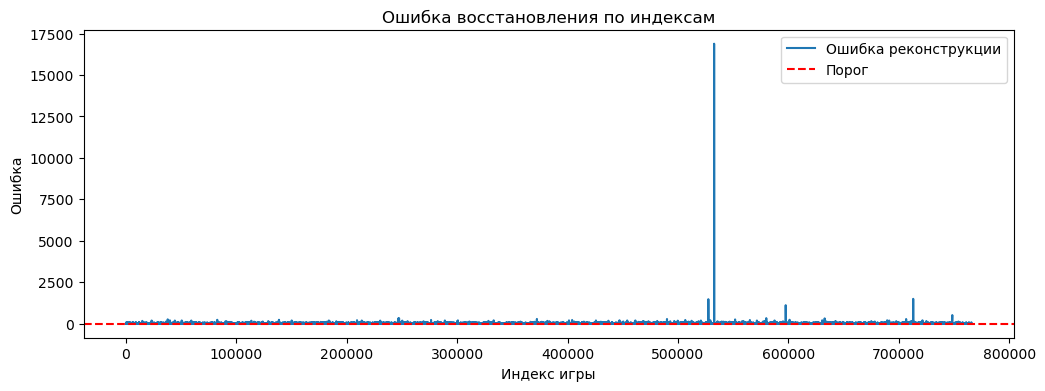

In [252]:
plt.figure(figsize=(12, 4))
plt.plot(reconstruction_error, label='Ошибка реконструкции')
plt.axhline(threshold, color='red', linestyle='--', label='Порог')
plt.title("Ошибка восстановления по индексам")
plt.xlabel("Индекс игры")
plt.ylabel("Ошибка")
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
    per_feature_error = ((X_tensor - reconstructed) ** 2).numpy()

plt.figure(figsize=(16,6))
plt.boxplot(per_feature_error, showfliers=False)
plt.xticks(ticks=range(len(df_sample.columns[2:])), labels=df_sample.columns[2:], rotation=80)
plt.title("Ошибка по признакам")
plt.xlabel("Признаки")
plt.ylabel("Ошибка")
plt.legend()
plt.show()

In [ ]:
anomaly_index = np.where(anomalies)[0][246]
normal_index = np.where(~anomalies)[0][180]

anomal_game = df_sample.iloc[anomaly_index, 2:]
normal_game = df_sample.iloc[normal_index, 2:]

In [ ]:
plt.figure(figsize=(14, 6))
x = range(len(df_sample.columns[3:]))

plt.bar(x, anomal_game.values[1:], alpha=0.6, label="Аномалия", color='red')
plt.bar(x, normal_game.values[1:], alpha=0.6, label="Норма", color='green')

plt.xticks(x, df_sample.columns[3:], rotation=80)
plt.ylabel("Значения признаков")
plt.title("Сравнение аномальной и нормальной игры")

plt.legend()
plt.tight_layout()
plt.savefig(f"graphs/neuro/sravnenie_10.png")
plt.show()

In [ ]:
with torch.no_grad():
    per_feature_error = ((X_tensor - reconstructed) ** 2).numpy()

anomalous_feature_errors = per_feature_error[anomalies]
mean_errors_per_feature = anomalous_feature_errors.mean(axis=0)
top_n = 10
top_indices = mean_errors_per_feature.argsort()[::-1][:top_n]
top_feature_names = cols[top_indices]
top_feature_errors = mean_errors_per_feature[top_indices]

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(top_feature_names[::-1], top_feature_errors[::-1], color='orange')
plt.xlabel("Средняя ошибка восстановления")
plt.title(f'Топ-{top_n} признаков, вызывающих аномалии')
plt.tight_layout()
plt.show()

Только партии, окончившиеся матом этого игрока

/opt/app-root/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


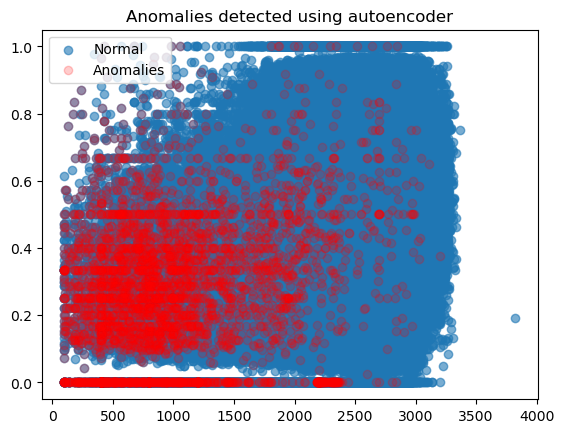

In [76]:
from matplotlib import pyplot as plt

anomalies_ae = df_checkmate[df_checkmate['anomaly_ae'] == True]
plt.scatter(df_checkmate[0], df_checkmate[4], label='Normal', alpha=0.6)
plt.scatter(anomalies_ae[0], anomalies_ae[4], color='red', label='Anomalies', alpha=0.2)
plt.legend()
plt.title("Anomalies detected using autoencoder")
plt.show()

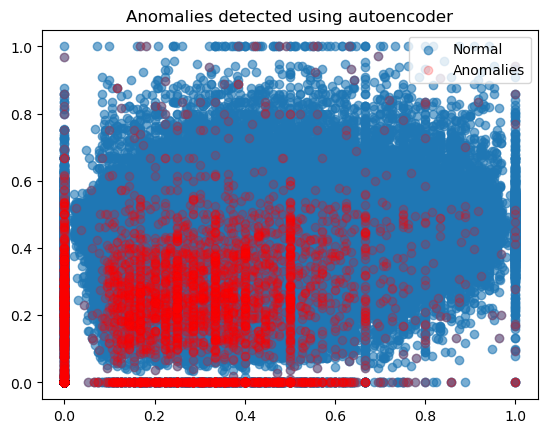

In [77]:
from matplotlib import pyplot as plt

anomalies_ae = df_checkmate[df_checkmate['anomaly_ae'] == True]
plt.scatter(df_checkmate[4], df_checkmate[14], label='Normal', alpha=0.6)
plt.scatter(anomalies_ae[4], anomalies_ae[14], color='red', label='Anomalies', alpha=0.2)
plt.legend()
plt.title("Anomalies detected using autoencoder")
plt.show()

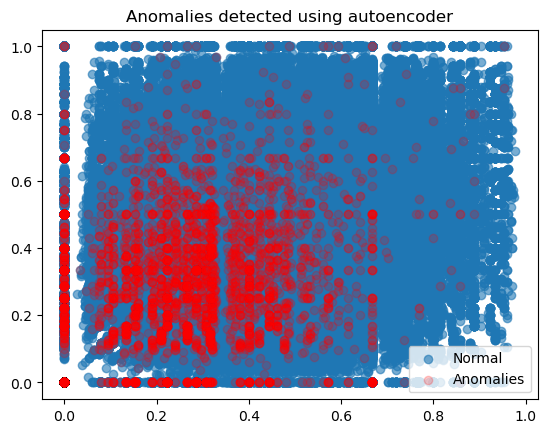

In [78]:
from matplotlib import pyplot as plt

anomalies_ae = df_checkmate[df_checkmate['anomaly_ae'] == True]
plt.scatter(df_checkmate[3], df_checkmate[4], label='Normal', alpha=0.6)
plt.scatter(anomalies_ae[3], anomalies_ae[4], color='red', label='Anomalies', alpha=0.2)
plt.legend()
plt.title("Anomalies detected using autoencoder")
plt.show()

/opt/app-root/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


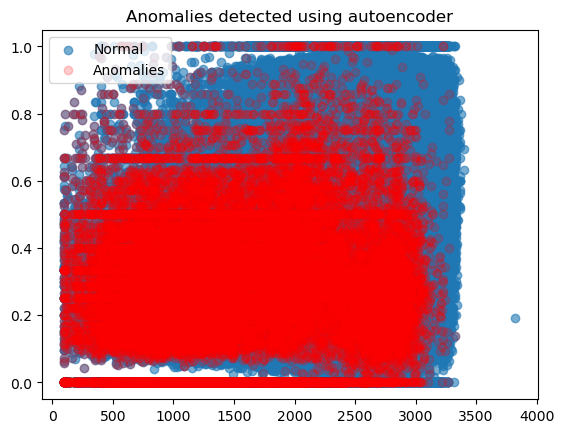

In [38]:
from matplotlib import pyplot as plt

anomalies_ae = df[df['anomaly_ae'] == True]
plt.scatter(df[0], df[4], label='Normal', alpha=0.6)
plt.scatter(anomalies_ae[0], anomalies_ae[4], color='red', label='Anomalies', alpha=0.2)
plt.legend()
plt.title("Anomalies detected using autoencoder")
plt.show()

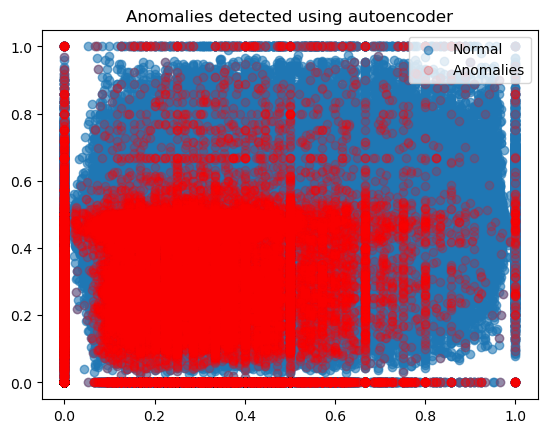

In [39]:
from matplotlib import pyplot as plt

anomalies_ae = df[df['anomaly_ae'] == True]
plt.scatter(df[4], df[14], label='Normal', alpha=0.6)
plt.scatter(anomalies_ae[4], anomalies_ae[14], color='red', label='Anomalies', alpha=0.2)
plt.legend()
plt.title("Anomalies detected using autoencoder")
plt.show()

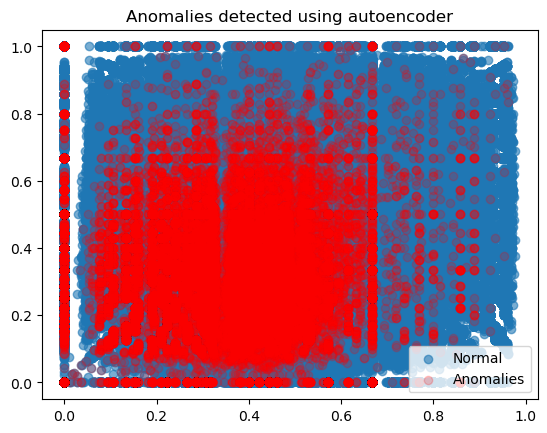

In [40]:
from matplotlib import pyplot as plt

anomalies_ae = df[df['anomaly_ae'] == True]
plt.scatter(df[3], df[4], label='Normal', alpha=0.6)
plt.scatter(anomalies_ae[3], anomalies_ae[4], color='red', label='Anomalies', alpha=0.2)
plt.legend()
plt.title("Anomalies detected using autoencoder")
plt.show()

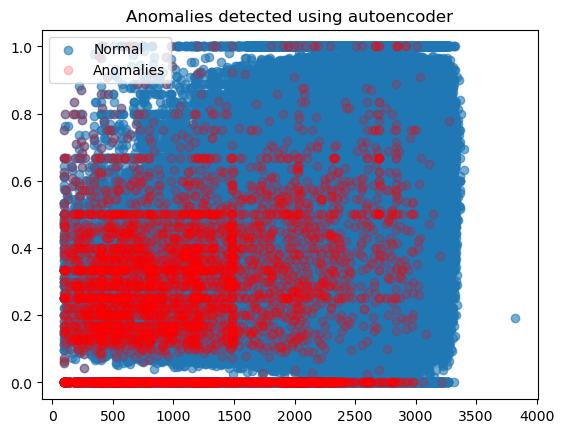

In [49]:
from matplotlib import pyplot as plt

anomalies_ae = df[df['anomaly_ae'] == True]
plt.scatter(df[0], df[4], label='Normal', alpha=0.6)
plt.scatter(anomalies_ae[0], anomalies_ae[4], color='red', label='Anomalies', alpha=0.2)
plt.legend()
plt.title("Anomalies detected using autoencoder")
plt.show()

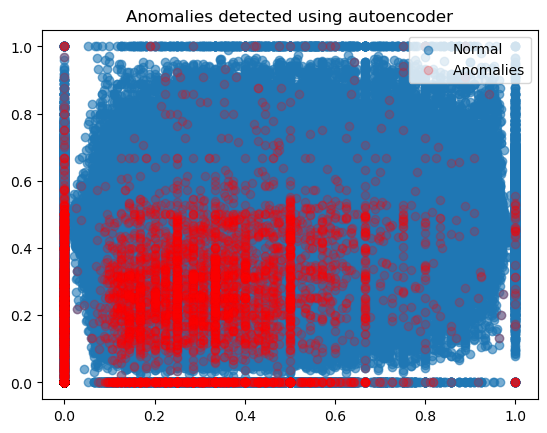

In [50]:
from matplotlib import pyplot as plt

anomalies_ae = df[df['anomaly_ae'] == True]
plt.scatter(df[4], df[14], label='Normal', alpha=0.6)
plt.scatter(anomalies_ae[4], anomalies_ae[14], color='red', label='Anomalies', alpha=0.2)
plt.legend()
plt.title("Anomalies detected using autoencoder")
plt.show()

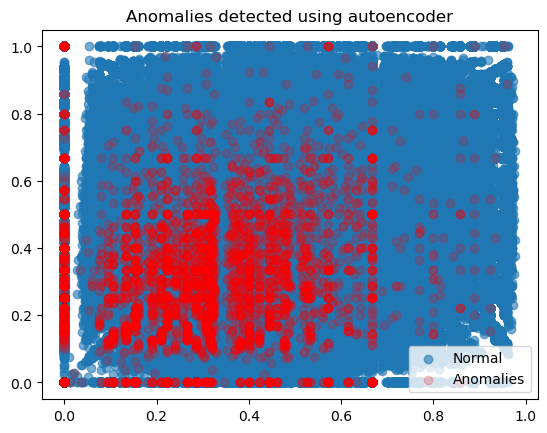

In [51]:
from matplotlib import pyplot as plt

anomalies_ae = df[df['anomaly_ae'] == True]
plt.scatter(df[3], df[4], label='Normal', alpha=0.6)
plt.scatter(anomalies_ae[3], anomalies_ae[4], color='red', label='Anomalies', alpha=0.2)
plt.legend()
plt.title("Anomalies detected using autoencoder")
plt.show()